In [ ]:
import cv2
import matplotlib.pyplot as plt

#loading the parameter to detect the face and nose
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
nose_cascade = cv2.CascadeClassifier("haarcascade_mcs_nose.xml")

#loading the face image
frame = cv2.imread("woman.jpeg")

#reading the nose image with alpha transparency
nose_pin = cv2.imread('nose_pin_best.png', -1)
height,width=nose_pin.shape[:2]
#rotating the nose-pin for a good fit on the nose
M=cv2.getRotationMatrix2D((width/2.0,height/2.0),20,1)
nose_pin=cv2.warpAffine(nose_pin,M,(width,height))

#mask of the pin
nose_pin_mask = nose_pin[:, :, 3]
nose_pin = nose_pin[:, :, 0:3]
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Detect faces using the function 'detectMultiScale'
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    #getting the co-ordinate of face part

    cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 0), 2)

    roi_gray = gray[y:y + h, x:x + w]
    roi_color = frame[y:y + h, x:x + w]
    noses = nose_cascade.detectMultiScale(roi_gray)
    c=0
    for (nx, ny, nw, nh) in noses:
        #getting the co-ordinate of nose part
        x1=int(nx+nw/2+nx/10)
        x2=int(nx+nw+nw/8)
        y1=int(ny+nh/6)
        y2=int(ny+nh-nh/8)

        if x1 < 0 or x2 < 0 or x2 > w or y2 > h:
            continue
        
        #resizing the nose-pin mask, and image to the desired size
        nose_pin_res_width = int(x2 - x1)
        nose_pin_res_height = int(y2 - y1)
        mask = cv2.resize(nose_pin_mask, (nose_pin_res_width, nose_pin_res_height))
        mask_inv = cv2.bitwise_not(mask)
        img = cv2.resize(nose_pin, (nose_pin_res_width, nose_pin_res_height))
        
        #extracting the desired nose part and then overlaying on the original face image
        roi = roi_color[y1:y2, x1:x2]
        roi_bakground = cv2.bitwise_and(roi, roi, mask=mask_inv)
        roi_foreground = cv2.bitwise_and(img, img, mask=mask)
        res = cv2.add(roi_bakground, roi_foreground)

        # Set res into the color ROI:
        roi_color[y1:y2, x1:x2] = res
        break


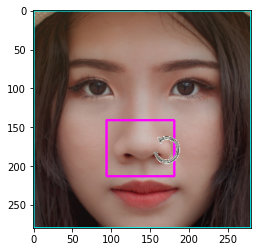

In [93]:
"""
first extracted the face part then the nose part
finally placed the nose-pin in the desired area
"""
plt.imshow(roi_color[:,:,::-1])

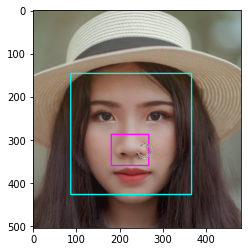

In [94]:
plt.imshow(frame[:,:,::-1])

(500, 500, 4)
(252, 200, 3)


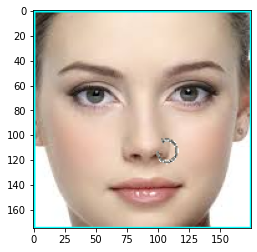

In [101]:
# frame = cv2.imread("face_test.png")
# gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.imshow(roi_color[:,:,::-1])

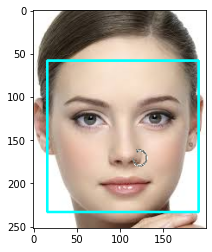

In [102]:
plt.imshow(frame[:,:,::-1])

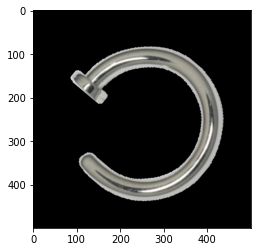

In [75]:
plt.imshow(nose_pin[:,:,::-1])

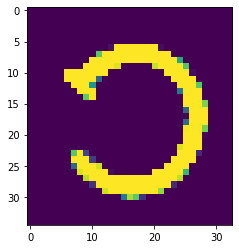

In [76]:
plt.imshow(mask)